In [6]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:12pt;}
</style>
"""))

<b><font color = "red" size = "6">ch11. ch11_N차원 배열 다루기(4~6절)</font></b>
- N차원 배열 객체
- 2차원 배열은 행렬개념으로 이해
- NumPy 패키지 이용 (C언어로 구현된 고성능 수치계산 패키지)
- C/C++, 포트란 코드의 통합도구

# 4절. 복사와 뷰

## 4.1 할당시 복사 안함(스칼라 변수만 제외)

In [5]:
# 스칼라 변수( 변수 하나에 값 하나)
a = 10
b = 'Hello'
c = 1.2

In [6]:
a1 = a

print('a =', a, 'a1 =', a1)
print(id(a), id(a1))

a = 90

print('-----수정 후-----')
print('a =', a, 'a1 =', a1)
print(id(a), id(a1))

a = 10 a1 = 10
140728941094992 140728941094992
-----수정 후-----
a = 90 a1 = 10
140728941097552 140728941094992


In [7]:
# 배열
a = np.arange(12)

a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [10]:
# a의 주소가 b에게 할당된다
b = a

In [11]:
# b변수가 a변수야?
b is a

True

In [13]:
# b의 각각의 요소 값이 a랑 같아?
b == a 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
b.shape, b.ndim

((12,), 1)

In [18]:
b.shape = (3, 4)

b.shape, b.ndim

((3, 4), 2)

In [19]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
id(a), id(b)

(2344193515664, 2344193515664)

## 4.2 얕은 복사
- '뷰(view)를 만든다'라고 한다.

In [27]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
# 얕은 복사
c = a.view()

c is a

False

In [26]:
c == a.view()

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [24]:
np.all(c == a)

True

In [25]:
# c는 메모리를 직접 소유하지 않는다.
c.flags.owndata

False

In [30]:
a.flags.owndata

True

In [31]:
c.shape, c.ndim

((3, 4), 2)

In [32]:
a.shape, a.ndim

((3, 4), 2)

In [33]:
c.shape = (2, 6)

c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [34]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
c[:, 2] = 999

c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [36]:
a # a도 메모리를 독자적으로 소유하지는 않는다.

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [8]:
# ▶ 슬라이싱이 될 때, 뷰가 반환된다. copy() 이용
a = np.array([[2, 1, 9, 50], 
              [7, 5, 7, 80], 
              [17, 6, 7, 90]])

# 독립변수 x, 슬라이싱될 때 뷰가 반환
# x = a[:, :-1] # 이런식으로 분할을 하면 안된다. 깊은 복사로!
x = a[:, :-1].copy()
print(a)
print(x)

# 종속변수 y

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [39]:
x[:, 0] = 99

a

array([[99,  1,  9, 50],
       [99,  5,  7, 80],
       [99,  6,  7, 90]])

## 4.3 깊은 복사
- copy()

In [1]:
a = np.arange(12).reshape(3, 4)
d = a.copy()

print(a)
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
x[0]  = [999, 999, 999]

x

array([[999, 999, 999],
       [  7,   5,   7],
       [ 17,   6,   7]])

In [10]:
a

array([[ 2,  1,  9, 50],
       [ 7,  5,  7, 80],
       [17,  6,  7, 90]])

In [2]:
d is a

False

In [3]:
np.all(d == a)

True

In [4]:
a[:, 0] = 99

a

array([[99,  1,  2,  3],
       [99,  5,  6,  7],
       [99,  9, 10, 11]])

In [5]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 5절. 고급인덱싱

## 5.1 인덱스를 배열로 인덱싱

In [11]:
a = np.arange(12) ** 2

a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [12]:
i = np.array([1, 1, 3, 8 , 5])

In [13]:
# i의 요소에 해당하는 a의 인덱스번호의 요소를 가져옴
a[i] 

array([ 1,  1,  9, 64, 25], dtype=int32)

In [14]:
j = np.array([[3, 4], 
              [9, 7]])

j

array([[3, 4],
       [9, 7]])

In [15]:
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [16]:
#                    R, G, B (색상)
palette = np.array([[0, 0, 0], # black
                    [255, 0, 0], # red 
                    [0, 255, 0], # green
                    [0, 0, 255], # blue
                    [255, 255, 255] # white
                   ])
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [17]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4], 
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4], 
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0], 
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0], 
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0], 
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0], 
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0], 
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4], 
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4], 
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]
                       ])

image_data = palette[image_index]
image_data.shape, image_data

((10, 10, 3),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0, 255],
         [255, 

In [ ]:
# matplotlib inline
# 예전 버전의 주피터 노트북에서 실행한 내용을 브라우저에서 시각화를 바로 볼 수 있게

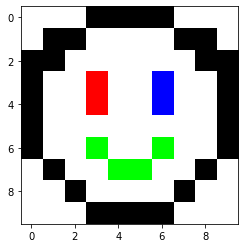

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(image_data)
plt.show()

In [20]:
# 아나콘다 prompt에서 tensorflow 패키지 설치
# pip install tensorflow
import tensorflow as tf

tf.__version__

'2.5.0'

In [22]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()

# 독립변수
mnist[0][0].shape

(60000, 28, 28)

In [23]:
# 종속변수(학습셋 = 훈련셋)
mnist[0][1].shape

(60000,)

In [24]:
mnist[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# 독립변수(테스트셋)
mnist[1][0].shape

(10000, 28, 28)

In [27]:
# 종속변수(테스트셋)
mnist[1][1].shape

(10000,)

In [28]:
X = mnist[0][0]
Y = mnist[0][1]

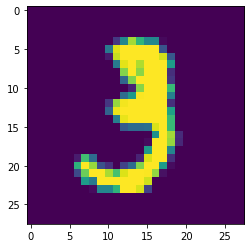

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[10])
plt.show() # 숫자를 컴퓨터에게 알려준 것

In [35]:
Y[10]

3

## 5.2 다차원 인덱싱

In [37]:
a = np.arange(12).reshape(3, 4)

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
i = np.array([[0, 1],
              [1, 2]]) # 행

j = np.array([[2, 1],
              [3, 3]]) # 열

a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [41]:
i = np.array([0, 1])
j = np.array([2, 3])

a[i, j]

array([2, 7])

## 5.3 argmax
- 최댓값이 있는 곳의 인덱스

In [42]:
data = np.sin(np.arange(20).reshape(5, 4))

data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [45]:
# 각 열 별 큰 값이 있는 인덱스
ind = data.argmax(axis = 0)

ind

array([2, 0, 3, 1], dtype=int64)

In [46]:
# 0열에서 최대값
data[ind[0], 0], data[ind[1], 1]

(0.9893582466233818, 0.8414709848078965)

In [49]:
data_col_max = data[ind, range(data.shape[1])]

data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [50]:
for i, item in enumerate(data_col_max):
    print('{}열의 최대값은 {}'.format(i, item))

0열의 최대값은 0.9893582466233818
1열의 최대값은 0.8414709848078965
2열의 최대값은 0.9906073556948704
3열의 최대값은 0.6569865987187891


In [52]:
np.all(data.max(axis = 0) == data_col_max)

True

In [71]:
# argmax 행 별 최대값을 출력하기
# argmax함수를 이용한 최대값 출력, np.all을 이용하여 max()결과와 비교

In [54]:
ind = data.argmax(axis = 1)

ind # ind = index의 앞 세글자!

array([2, 3, 0, 2, 3], dtype=int64)

In [55]:
data_row_max = data[range(data.shape[0]), ind]

data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [62]:
for i, item in enumerate(data_row_max):
    print("{}행의 최대 값은 {}".format(i+1, round(item, 5)))

1행의 최대 값은 0.9093
2행의 최대 값은 0.65699
3행의 최대 값은 0.98936
4행의 최대 값은 0.99061
5행의 최대 값은 0.14988


In [63]:
np.all(data.max(axis = 1) == data_row_max)

True

## 5.4 인덱싱을 이용한 값 변경

In [64]:
a = np.arange(5)

a

array([0, 1, 2, 3, 4])

In [65]:
a[::2] = 99 # 0,2,4번인덱스에 99 삽입

a

array([99,  1, 99,  3, 99])

## 5.5 논리 배열을 이용한 인덱싱

In [66]:
a = np.arange(20).reshape(2, 10)

a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [67]:
b = a%2 == 0

b

array([[ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False]])

In [68]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [69]:
a[a%3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18])

# 6절. 선형대수
- 2차원 넘파이 배열을 행렬
    - 행렬곱 : @ 또는 np.dot()
    - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T, x.transpose()
    - 단위행렬 : np.eye(n), n행 n열의 단위행렬
    - 연립방정식 해 풀기 : np.linalg.inv(x, y), 단 x가 정방행렬이어야함.

## 6.1 선형 연립 방정식
- 회귀 도출 : 독립변수 2개, 데이터 2개

In [73]:
# a의 (역행렬 @ a)는 단위행렬
a = np.array([[1, 2],
              [3, 4]])

np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [74]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [75]:
np.all(np.linalg.inv(a) @ a == np.eye(2))

False

In [76]:
np.all(np.eye(2) @ a == a)

True

In [77]:
a.T

array([[1, 3],
       [2, 4]])

In [78]:
a = np.array([[2, 2, 2],
              [3, 3, 3]])

a

array([[2, 2, 2],
       [3, 3, 3]])

In [ ]:
# 정방행렬이 아니어서 오류가 발생한다
np.linalg.inv(a)

In [79]:
# 정방행렬을 만들고자 할 때 전치행렬 이용
a.T @ a

array([[13, 13, 13],
       [13, 13, 13],
       [13, 13, 13]])

### 6.1.1 독립변수 2개, 데이터 2개

In [80]:
# 독립변수
x = np.array([[1, 2], 
              [3, 4]])

In [81]:
# 종속변수
y = np.array([[5], 
              [7]])

x @ W = y<br>
x의 역행렬 @ x @ W = x의 역행렬 @ y<br>
(x의 역행렬 @ x)전치행렬 @ W = x의 역행렬 @ y<br>
W = x의 역행렬 @ y

In [82]:
W = np.linalg.inv(x) @ y

W

array([[-3.],
       [ 4.]])

In [84]:
# 독립변수 2, 3일 경우 종속변수는?
2 * W[0] + 3 * W[1]

array([6.])

## 6.2 선형 연립방정식(회귀 도출)과 그래프
- 독립변수 1

**정방행렬을 위해 데이터 2**

In [91]:
x = [2, 3]
y = [6.8, 7.3]

In [92]:
# 독립변수를 배열로 만들기
X = np.column_stack((x, np.ones(len(x))))

In [93]:
Y = np.array(y).reshape(2, 1)

Y

array([[6.8],
       [7.3]])

**X @ W = Y**<br>
**= X의 역행렬 @ X @ W = X의 역행렬 @ Y**<br>
**= 단위행렬 @ W = X의 역행렬 @ Y**<br>
**= W = X의 역행렬 @ Y**

In [94]:
W = np.linalg.inv(X) @ Y

W

array([[0.5],
       [5.8]])

In [95]:
f = X[:, 0] * W[0] + W[1]

f

array([6.8, 7.3])

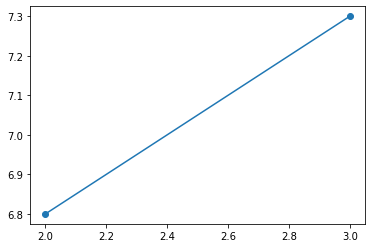

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, f, '-')
plt.show()

**데이터 n개로**

In [104]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158]) # 독립변수
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125]) # 종속변수

In [105]:
X = np.column_stack((x, np.ones(len(x)))) # 독립변수를 행렬로 만들기
Y = np.array(y).reshape(len(y), 1) # 종속변수 행렬

print(X)
print(Y)

[[ 32.    1. ]
 [ 64.    1. ]
 [ 96.    1. ]
 [118.    1. ]
 [126.    1. ]
 [144.    1. ]
 [152.5   1. ]
 [158.    1. ]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130.3]
 [125. ]]


In [106]:
X.T @ X # 정방행렬을 만들기 위해 전치행렬을 곱해준다.

array([[1.1309225e+05, 8.9050000e+02],
       [8.9050000e+02, 8.0000000e+00]])

In [ ]:
# 정방행렬 x 역행렬 = 단위행렬
# X.T @ X x np.linalg.inv(X.T @ X)

In [107]:
W = np.linalg.inv(X.T @ X) @ X.T @ Y

W

array([[  0.87493126],
       [-26.79078617]])

In [119]:
# 예측치 = X의 모든행의 0열 * X의 절편 * Y의 절편
f = X[:, 0] * W[0] * W[1]

f

array([ -750.08308377, -1500.16616755, -2250.24925132, -2765.93137142,
       -2953.45214236, -3375.37387698, -3574.61469611, -3703.53522613])

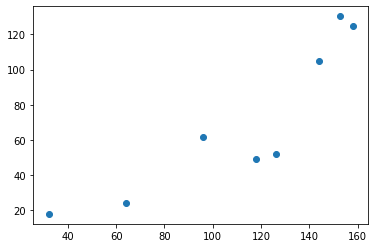

In [124]:
plt.scatter(x, y)

# 연습문제

## 실습형

In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

print(iris.data) # 독립변수
print(iris.target) # 종속변수

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
iris_data = iris.data

In [4]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [5]:
# 1.
iris_data.mean(axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [6]:
# 2.
print(iris_data[:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# 3.
a = iris_data[:5, :-1]

a

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [8]:
# 4.
b = iris_data[:5, -1]

b

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
# 5.
c = np.column_stack((a, b))

c

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
# 6.
d = iris_data[:5, :]

d.mean(axis = 0)

array([4.86, 3.28, 1.4 , 0.2 ])